In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC



In [2]:

companies_tech=["005930.KS","AAPL","ADBE","AMZN","CSCO","EBAY",
                "HPQ","IBM","INTC","MSFT","NTDOY","ORCL"]

companies=companies_tech

dfs = {}
for company in companies:
    
    path=f'Prediction Bankruptcy Data/{company}_'

    df1=pd.read_csv(path+'annual_financials.csv')
    df2=pd.read_csv(path+'annual_balance-sheet.csv')
    df3=pd.read_csv(path+'annual_cash-flow.csv')
    
    for column in df1.columns[2:]:
        column1 = pd.to_datetime(column).date()
        new_column_name = column1.replace(month=12,day=31).strftime("%Y-%m-%d")
        df1 = df1.rename(columns={column: new_column_name})
    
    
    for columnn in df2.columns[1:]:
        column2 = pd.to_datetime(columnn).date()
        new_column_name = column2.replace(month=12,day=31).strftime("%Y-%m-%d")
        df2 = df2.rename(columns={columnn: new_column_name})
        
    for columnnn in df3.columns[2:]:
        column3 = pd.to_datetime(columnnn).date()
        new_column_name = column3.replace(month=12,day=31).strftime("%Y-%m-%d")
        df3 = df3.rename(columns={columnnn: new_column_name})
        
    # Drop duplicate columns
    df1 = df1.loc[:, ~df1.columns.duplicated()]
    df2 = df2.loc[:, ~df2.columns.duplicated()]
    df3 = df3.loc[:, ~df3.columns.duplicated()]

       
    df=pd.concat([df1,df2,df3],ignore_index=True)
    
    df.insert(0,"Company Name",company)
    
    if company in companies_tech:
        df.insert(0,"Sector","Tech")
    else:
        pass
    
    dfs[company] = df   
 
    
df = pd.concat(dfs.values())

df.drop(['ttm'], axis=1, inplace=True)

df
#df.to_csv('hulya.csv', index = False)

,Sector,Company Name,name,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,...,1993-12-31,1992-12-31,1991-12-31,1990-12-31,1989-12-31,1988-12-31,1987-12-31,1986-12-31,1985-12-31,2020-12-31
0,Tech,005930.KS,TotalRevenue,"230,400,881,000,000","243,771,415,000,000","239,575,376,000,000","201,866,745,000,000","200,653,482,000,000","206,205,987,000,000","228,692,667,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tech,005930.KS,CostOfRevenue,"147,239,549,000,000","132,394,411,000,000","129,290,661,000,000","120,277,715,000,000","123,482,118,000,000","128,278,800,000,000","137,696,309,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tech,005930.KS,GrossProfit,"83,161,332,000,000","111,377,004,000,000","110,284,715,000,000","81,589,030,000,000","77,171,364,000,000","77,927,187,000,000","90,996,358,000,000.02",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tech,005930.KS,OperatingExpense,"55,392,823,000,000","52,490,335,000,000","56,639,677,000,000","52,348,358,000,000","50,757,922,000,000","52,902,116,000,000","54,211,344,999,999.99",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tech,005930.KS,\tResearchAndDevelopment,"19,907,236,000,000","18,354,080,000,000","16,355,612,000,000","14,111,381,000,000","13,705,695,000,000","14,385,506,000,000","14,319,402,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Tech,ORCL,EndCashPosition,"20,514,000,000","21,620,000,000","21,784,000,000","20,152,000,000","21,716,000,000","17,769,000,000","14,613,000,000",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,"37,239,000,000"
91,Tech,ORCL,FreeCashFlow,"12,891,000,000","13,650,000,000","12,105,000,000","12,372,000,000","12,945,000,000","14,341,000,000","13,574,000,000",...,"276,200,000","195,700,000","28,700,000","-60,700,000",NaN,NaN,NaN,NaN,NaN,"11,575,000,000"
92,Tech,ORCL,\tOperatingCashFlow,"14,551,000,000","15,386,000,000","14,126,000,000","13,561,000,000","14,336,000,000","14,921,000,000","14,224,000,000",...,"317,500,000","242,300,000","89,400,000","28,600,000",NaN,NaN,NaN,NaN,NaN,"13,139,000,000"
93,Tech,ORCL,\tCapitalExpenditure,"-1,660,000,000","-1,736,000,000","-2,021,000,000","-1,189,000,000","-1,391,000,000","-580,000,000","-650,000,000",...,"-41,300,000","-46,600,000","-60,700,000","-89,300,000",NaN,NaN,NaN,NaN,NaN,"-1,564,000,000"


In [3]:
df['name']=df['name'].str.replace('\t','')

df = df[df['Company Name'].isin(companies)]
columns=df.columns[3:]

for column in columns:
    df[column] = df[column].str.replace(',','').astype(float)
    
pd.set_option('display.float_format', '{:.2f}'.format)

df=df.drop(['Sector'],axis=1)
df = df.drop_duplicates(subset=['name', 'Company Name'])
df.rename(columns={col: pd.to_datetime(col).year for col in df.columns[2:]}, inplace=True)
df.drop(2020, axis=1, inplace=True)
df = df.drop_duplicates()
df = df[(df['name'].isin(['TotalRevenue','ChangeInWorkingCapital','TotalAssets','RetainedEarnings','Ebitda','TotalLiabilitiesNetMinorityInterest','MarketCap','PretaxIncome','StockholdersEquity'])) ]

df 

,Company Name,name,2019,2018,2017,2016,2015,2014,2013,2012,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
0,005930.KS,TotalRevenue,230400881000000.00,243771415000000.00,239575376000000.00,201866745000000.00,200653482000000.00,206205987000000.00,228692667000000.00,201103613000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,005930.KS,PretaxIncome,30432189000000.00,61159958000000.00,56195967000000.00,30713652000000.00,25960995000000.00,27875034000000.00,38364279000000.01,29915017000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,005930.KS,Ebitda,60716183000000.00,88316612000000.00,78968761000000.00,52014448000000.00,47668363000000.00,46521395000000.00,55319350000000.01,46136039000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,005930.KS,TotalAssets,352564497000000.00,339357244000000.00,301752090000000.00,262174324000000.00,242179521000000.00,230422958000000.00,214075018000000.00,181071570000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,005930.KS,TotalLiabilitiesNetMinorityInterest,89684076000000.00,91604067000000.00,87260662000000.00,69211291000000.00,63119716000000.00,62334770000000.00,64059008000000.00,59591364000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,ORCL,TotalAssets,108709000000.00,137264000000.00,134991000000.00,112180000000.00,110903000000.00,90344000000.00,81812000000.00,78327000000.00,...,1595000000.00,1184000000.00,955600000.00,857600000.00,787200000.00,460200000.00,249600000.00,143800000.00,57400000.00,NaN
41,ORCL,TotalLiabilitiesNetMinorityInterest,86346000000.00,91040000000.00,80745000000.00,64390000000.00,61805000000.00,42897000000.00,36667000000.00,34240000000.00,...,854400000.00,656000000.00,520600000.00,512900000.00,399600000.00,229600000.00,115000000.00,61100000.00,28700000.00,NaN
56,ORCL,StockholdersEquity,21785000000.00,45726000000.00,53860000000.00,47289000000.00,48663000000.00,46878000000.00,44648000000.00,43688000000.00,...,740600000.00,528000000.00,435000000.00,344700000.00,387600000.00,230600000.00,134600000.00,82700000.00,28700000.00,NaN
58,ORCL,RetainedEarnings,-3496000000.00,18412000000.00,27598000000.00,23888000000.00,26503000000.00,25965000000.00,25854000000.00,26087000000.00,...,488600000.00,332400000.00,265800000.00,204300000.00,267500000.00,150100000.00,68300000.00,25400000.00,9800000.00,NaN


In [4]:
dfs = []

for company in companies:
    start_year = 1985
    end_year = 2020

    ticker = yf.Ticker(company)

    for year in range(start_year, end_year + 1):
        start_date = datetime.date(year, 1, 1)
        end_date = datetime.date(year, 12, 31)

        # Get historical stock price data for the year
        historical_data = ticker.history(period="1d", start=start_date, end=end_date)
        if not historical_data.empty:
        # Extract the 'Close' column (closing stock prices) from the historical data
              closing_prices = historical_data['Close']

        # Get the number of shares outstanding from the company's info
              shares_outstanding = ticker.info['sharesOutstanding']

        # Calculate historical market capitalization by multiplying closing prices by shares outstanding
              historical_market_cap = closing_prices * shares_outstanding

        # Get the last date of the year
              last_date = historical_market_cap.index[-1]

        # Get the market capitalization value for the last date
              market_cap_value = historical_market_cap[last_date]
        else:
              market_cap_value=np.nan
                
        # Create a DataFrame for the current year and company
        df_mc = pd.DataFrame({
                 "Company Name": [company],
                 "Year": [year],
                 "name": [market_cap_value]
        })

        dfs.append(df_mc)
        
market_cap_df = pd.concat(dfs, ignore_index=True)

market_cap_df

005930.KS: Data doesn't exist for startDate = 473353200, endDate = 504802800
005930.KS: Data doesn't exist for startDate = 504889200, endDate = 536338800
005930.KS: Data doesn't exist for startDate = 536425200, endDate = 567874800
005930.KS: Data doesn't exist for startDate = 567961200, endDate = 599497200
005930.KS: Data doesn't exist for startDate = 599583600, endDate = 631033200
005930.KS: Data doesn't exist for startDate = 631119600, endDate = 662569200
005930.KS: Data doesn't exist for startDate = 662655600, endDate = 694105200
005930.KS: Data doesn't exist for startDate = 694191600, endDate = 725727600
005930.KS: Data doesn't exist for startDate = 725814000, endDate = 757263600
005930.KS: Data doesn't exist for startDate = 757350000, endDate = 788799600
005930.KS: Data doesn't exist for startDate = 788886000, endDate = 820335600
005930.KS: Data doesn't exist for startDate = 820422000, endDate = 851958000
005930.KS: Data doesn't exist for startDate = 852044400, endDate = 883494000

,Company Name,Year,name
0,005930.KS,1985,NaN
1,005930.KS,1986,NaN
2,005930.KS,1987,NaN
3,005930.KS,1988,NaN
4,005930.KS,1989,NaN
...,...,...,...
427,ORCL,2016,94001307794.60
428,ORCL,2017,117442263606.43
429,ORCL,2018,113121833870.37
430,ORCL,2019,135278559023.54


In [5]:
market_cap_df_pivot = market_cap_df.pivot(index='Company Name', columns='Year', values='name')

market_cap_df_pivot.reset_index(drop=False, inplace=True)

market_cap_df_pivot.insert(1, "name", "MarketCap")
market_cap_df_pivot.columns.name = None

market_cap_df_pivot

,Company Name,name,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,005930.KS,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99327255478864.00,143682839140454.00,130856125044205.00,128464878272683.00,124033657324968.00,180270386202288.00,259521317426748.00,203387543938838.00,301959202469194.00,458506871353460.00
1,AAPL,MarketCap,1203288447.47,2217306690.98,4714965813.56,4412465606.03,3902282124.26,4819355856.71,6419935003.16,6704191042.00,...,191944772243.33,243658612956.02,271802441441.66,394192816212.52,382381583524.08,421848627629.74,626294664333.41,586864030287.98,1111522262915.42,2057029918997.44
2,ADBE,MarketCap,NaN,166991113.39,387419326.62,654605395.71,541051178.62,785872581.98,1782087636.42,856633220.78,...,12871331208.42,16800570694.73,27113114652.63,33273324833.68,43380983444.21,46873133610.53,79786774501.04,101591091223.14,149493200332.64,226488990557.86
3,AMZN,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89300560122.29,126485913881.50,202935667400.28,160080677493.06,355484325769.95,386850448578.09,603317897254.02,762495780983.62,952792099539.89,1695137186020.64
4,CSCO,MarketCap,NaN,NaN,NaN,NaN,NaN,427593343.44,1298526612.80,3047660043.55,...,51029366010.67,56371940455.17,65944169693.22,86726696942.25,86768578460.64,98557217671.47,129374351220.60,148864608420.47,170320817005.43,164661226275.22
5,EBAY,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6295894736.45,10339549659.67,11211384458.83,11877715478.79,13686568949.37,14643394504.69,18613730766.72,13928237496.07,17923593727.76,25672169725.33
6,HPQ,MarketCap,882573402.48,1009843102.88,1413993793.73,1288356539.29,1151834623.12,788690058.37,1403622080.42,1761043806.68,...,8216373336.50,4487389616.87,9430427283.08,13926726227.25,9157075964.45,11918200242.77,17363827453.67,17225862472.47,17945984557.70,22091857501.35
7,IBM,MarketCap,13076440559.78,10308982290.49,10291048458.15,11132013310.70,8968608599.52,11311314275.60,9438778740.44,5545313070.15,...,102691421107.86,107799009921.01,107911022959.30,94901038012.82,85319141347.67,105510117036.41,101302545618.41,78009039523.32,96056726766.45,94647000004.05
8,INTC,MarketCap,1459108921.77,1051052275.30,1984637618.06,1762061401.61,2559623618.60,2810022954.23,3616861957.31,6538640191.56,...,71362189842.22,61600715332.03,81854156776.43,120091104492.19,117748143241.88,126082270271.30,165004075103.76,171318362503.05,223931901809.69,187657288284.30
9,MSFT,MarketCap,NaN,765175411.44,1786741157.62,1706618416.95,2788277353.31,4807373739.33,10648332438.52,12384992939.48,...,153603292363.50,161537048746.50,233747256666.00,302808974475.00,372508897824.00,422356236256.50,594384454545.00,709647322377.00,1130460047766.00,1607050747092.00


In [6]:
merged_df = pd.concat([df, market_cap_df_pivot], ignore_index=True)
merged_df

,Company Name,name,2019,2018,2017,2016,2015,2014,2013,2012,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,2020
0,005930.KS,TotalRevenue,230400881000000.00,243771415000000.00,239575376000000.00,201866745000000.00,200653482000000.00,206205987000000.00,228692667000000.00,201103613000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,005930.KS,PretaxIncome,30432189000000.00,61159958000000.00,56195967000000.00,30713652000000.00,25960995000000.00,27875034000000.00,38364279000000.01,29915017000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,005930.KS,Ebitda,60716183000000.00,88316612000000.00,78968761000000.00,52014448000000.00,47668363000000.00,46521395000000.00,55319350000000.01,46136039000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,005930.KS,TotalAssets,352564497000000.00,339357244000000.00,301752090000000.00,262174324000000.00,242179521000000.00,230422958000000.00,214075018000000.00,181071570000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,005930.KS,TotalLiabilitiesNetMinorityInterest,89684076000000.00,91604067000000.00,87260662000000.00,69211291000000.00,63119716000000.00,62334770000000.00,64059008000000.00,59591364000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,IBM,MarketCap,96056726766.45,78009039523.32,101302545618.41,105510117036.41,85319141347.67,94901038012.82,107911022959.30,107799009921.01,...,6512267829.89,5545313070.15,9438778740.44,11311314275.60,8968608599.52,11132013310.70,10291048458.15,10308982290.49,13076440559.78,94647000004.05
104,INTC,MarketCap,223931901809.69,171318362503.05,165004075103.76,126082270271.30,117748143241.88,120091104492.19,81854156776.43,61600715332.03,...,9397043071.75,6538640191.56,3616861957.31,2810022954.23,2559623618.60,1762061401.61,1984637618.06,1051052275.30,1459108921.77,187657288284.30
105,MSFT,MarketCap,1130460047766.00,709647322377.00,594384454545.00,422356236256.50,372508897824.00,302808974475.00,233747256666.00,161537048746.50,...,11717967899.20,12384992939.48,10648332438.52,4807373739.33,2788277353.31,1706618416.95,1786741157.62,765175411.44,NaN,1607050747092.00
106,NTDOY,MarketCap,46289783482.04,30698417097.42,41977477172.66,24169415398.63,16085001883.29,12117305997.65,15591368605.21,12294269457.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75181313320.74


# CALCULATE FINANCIAL RATIOS FOR EACH COMPANY and FIND Z SCORE FOR y

In [7]:
dfdict = {}

for company in companies:
    dfexp = (merged_df[merged_df['Company Name'] == company]).copy()#.fillna(0))
    cname = dfexp.pop('Company Name').values[0]
    dfexp.set_index('name', inplace = True)
    
    #dfexp.loc['Ebit']= ((dfexp.loc['Ebitda']-dfexp.loc['DepreciationAndAmortization']) if 'Ebitda' in dfexp.index else (dfexp.loc['GrossProfit']-dfexp.loc['OperatingExpense']))
    dfexp.loc['Working Capital'] = (dfexp.loc['TotalAssets'] - dfexp.loc['TotalLiabilitiesNetMinorityInterest'])
    
    dfexp.loc['X_CWC'] = dfexp.loc['Working Capital']
    dfexp.loc['X_TA'] = dfexp.loc['TotalAssets']
    dfexp.loc['X_RE'] = dfexp.loc['RetainedEarnings']
    dfexp.loc['X_E'] = dfexp.loc['PretaxIncome']
    dfexp.loc['X_TR'] = dfexp.loc['TotalRevenue']
    dfexp.loc['X_TLMI'] = dfexp.loc['TotalLiabilitiesNetMinorityInterest']
    dfexp.loc['X_MC'] = dfexp.loc['MarketCap']
    dfexp.loc['X_SE'] = dfexp.loc['StockholdersEquity']
    
    
    #Find Z score for y
    dfexp.loc['F_1'] = dfexp.loc['X_CWC']/dfexp.loc['X_TA']
    dfexp.loc['F_2'] = dfexp.loc['X_RE']/dfexp.loc['X_TA']
    dfexp.loc['F_3'] = dfexp.loc['X_E'] / dfexp.loc['X_TA']
    dfexp.loc['F_4'] = dfexp.loc['X_MC']/dfexp.loc['X_TLMI']
    dfexp.loc['F_5'] = dfexp.loc['X_TR']/dfexp.loc['X_TA']
    dfexp.loc['F_6'] = dfexp.loc['X_SE']/dfexp.loc['X_TLMI']
    
    dfexp.loc['Z-Score'] =(1.2 *dfexp.loc['F_1']+1.4 *dfexp.loc['F_2']+3.3 *dfexp.loc['F_3'] +0.6 *dfexp.loc['F_4']+1.0 *dfexp.loc['F_5'])
    dfexp.loc['Z1-Score'] =(0.717*dfexp.loc['F_1'] + 0.847*dfexp.loc['F_2'] + 3.107*dfexp.loc['F_3'] + 0.420*dfexp.loc['F_6'] + 0.998*dfexp.loc['F_5'])
    dfexp.loc['Z2-Score'] =(6.56*dfexp.loc['F_1'] + 3.26*dfexp.loc['F_2'] + 6.72*dfexp.loc['F_3'] + 1.05*dfexp.loc['F_6'])
    dfexp.loc['Y'] = dfexp.loc['Z-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.8 else ('Safe Zone' if x > 2.99 else ('Gray Zone' if (1.8 <= x <= 2.99) else np.nan))
)
    dfexp.loc['Y1'] = dfexp.loc['Z1-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.23 else ('Safe Zone' if x > 2.90 else ('Gray Zone' if (1.23 <= x <= 2.90) else np.nan))
)
    dfexp.loc['Y2'] = dfexp.loc['Z2-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.1 else ('Safe Zone' if x > 2.6 else ('Gray Zone' if (1.1 <= x <= 2.6) else np.nan))
)

    
    dfexp.insert(0,'Company Name', cname)
    
    dfdict[company] = dfexp.reset_index()
    
dff = pd.concat(dfdict.values()).reset_index(drop=True)
#Company Name and Varaible make one
#dff.reset_index(inplace=True)

dff['Company Name&Variable'] = dff['name'] + ' - ' + dff['Company Name']
dff.set_index('Company Name&Variable', inplace=True)
dff.drop(['name', 'Company Name'], axis=1, inplace=True)
#dff.set_index('name', inplace=True)

dff

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,2020
Company Name&Variable,,,,,,,,,,,,,,,,,,,,,
TotalRevenue - 005930.KS,230400881000000.00,243771415000000.00,239575376000000.00,201866745000000.00,200653482000000.00,206205987000000.00,228692667000000.00,201103613000000.00,165001771227974.50,154630327781024.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PretaxIncome - 005930.KS,30432189000000.00,61159958000000.00,56195967000000.00,30713652000000.00,25960995000000.00,27875034000000.00,38364279000000.01,29915017000000.00,17159014989969.54,19328656365268.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ebitda - 005930.KS,60716183000000.00,88316612000000.00,78968761000000.00,52014448000000.00,47668363000000.00,46521395000000.00,55319350000000.01,46136039000000.00,31395211459915.18,31303643844758.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAssets - 005930.KS,352564497000000.00,339357244000000.00,301752090000000.00,262174324000000.00,242179521000000.00,230422958000000.00,214075018000000.00,181071570000000.00,155631250757000.19,134288743480498.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalLiabilitiesNetMinorityInterest - 005930.KS,89684076000000.00,91604067000000.00,87260662000000.00,69211291000000.00,63119716000000.00,62334770000000.00,64059008000000.00,59591364000000.00,53785931528534.92,44939652557120.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z1-Score - ORCL,0.94,1.15,1.29,1.44,1.55,1.97,2.16,2.21,2.12,1.86,...,2.73,2.46,1.92,2.96,3.14,3.05,2.64,2.45,NaN,NaN
Z2-Score - ORCL,2.27,3.80,4.58,4.95,5.29,6.55,7.07,7.23,6.89,6.14,...,5.92,5.45,4.02,6.83,7.16,7.41,7.07,6.12,NaN,NaN
Y - ORCL,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Safe Zone,Safe Zone,Safe Zone,Safe Zone,Safe Zone,...,Safe Zone,Safe Zone,Gray Zone,Safe Zone,Safe Zone,Safe Zone,Safe Zone,Safe Zone,NaN,NaN


In [8]:
dataframe = pd.DataFrame(dff.loc[dff.index.str.strip().str.startswith(('F_', 'X', 'Y','Z')), :])
dataframe=dataframe.T
dataframe

Company Name&Variable,X_CWC - 005930.KS,X_TA - 005930.KS,X_RE - 005930.KS,X_E - 005930.KS,X_TR - 005930.KS,X_TLMI - 005930.KS,X_MC - 005930.KS,X_SE - 005930.KS,F_1 - 005930.KS,F_2 - 005930.KS,...,F_3 - ORCL,F_4 - ORCL,F_5 - ORCL,F_6 - ORCL,Z-Score - ORCL,Z1-Score - ORCL,Z2-Score - ORCL,Y - ORCL,Y1 - ORCL,Y2 - ORCL
2019,262880421000000.00,352564497000000.00,254582894000000.00,30432189000000.00,230400881000000.00,89684076000000.00,301959202469194.00,254915472000000.00,0.75,0.72,...,0.11,1.57,0.36,0.25,1.88,0.94,2.27,Gray Zone,Distress Zone,Gray Zone
2018,247753177000000.00,339357244000000.00,242698956000000.00,61159958000000.00,243771415000000.00,91604067000000.00,203387543938838.00,240068993000000.00,0.73,0.72,...,0.09,1.24,0.29,0.50,1.94,1.15,3.80,Gray Zone,Distress Zone,Safe Zone
2017,214491428000000.00,301752090000000.00,215811200000000.00,56195967000000.00,239575376000000.00,87260662000000.00,259521317426748.00,207213416000000.00,0.71,0.72,...,0.09,1.45,0.28,0.67,2.20,1.29,4.58,Gray Zone,Gray Zone,Safe Zone
2016,192963033000000.00,262174324000000.00,193086317000000.00,30713652000000.00,201866745000000.00,69211291000000.00,180270386202288.00,186424328000000.00,0.74,0.74,...,0.10,1.46,0.33,0.73,2.35,1.44,4.95,Gray Zone,Gray Zone,Safe Zone
2015,179059805000000.00,242179521000000.00,185132014000000.00,25960995000000.00,200653482000000.00,63119716000000.00,124033657324968.00,172876767000000.00,0.74,0.76,...,0.12,1.44,0.34,0.79,2.46,1.55,5.29,Gray Zone,Gray Zone,Safe Zone
2014,168088188000000.00,230422958000000.00,169529604000000.00,27875034000000.00,206205987000000.00,62334770000000.00,128464878272683.00,162181725000000.00,0.73,0.74,...,0.15,2.51,0.42,1.09,3.46,1.97,6.55,Safe Zone,Gray Zone,Safe Zone
2013,150016010000000.00,214075018000000.00,148600282000000.00,38364279000000.01,228692667000000.00,64059008000000.00,130856125044205.00,144442616000000.00,0.70,0.69,...,0.17,2.43,0.45,1.22,3.58,2.16,7.07,Safe Zone,Gray Zone,Safe Zone
2012,121480206000000.00,181071570000000.00,119985689000000.00,29915017000000.00,201103613000000.00,59591364000000.00,143682839140454.00,117094052000000.00,0.67,0.66,...,0.17,2.25,0.47,1.28,3.51,2.21,7.23,Safe Zone,Gray Zone,Safe Zone
2011,101845319228465.27,155631250757000.19,97542524985673.16,17159014989969.54,165001771227974.50,53785931528534.92,99327255478864.00,97480294483247.86,0.65,0.63,...,0.16,1.77,0.48,1.19,3.14,2.12,6.89,Safe Zone,Gray Zone,Safe Zone
2010,89349090923377.95,134288743480498.50,85014550370411.11,19328656365268.64,154630327781024.19,44939652557120.55,88625625736044.50,85470091898242.86,0.67,0.63,...,0.13,2.35,0.44,1.01,3.26,1.86,6.14,Safe Zone,Gray Zone,Safe Zone


# After Data CALCULATE&Cleaning 

In [9]:
dfs = {}

for company in companies:
    df_company = pd.DataFrame()  
    
    for i in range(1, 7):
        column_name_f = f'F_{i} - {company}'
        df_company[f'F_{i}'] = dataframe[column_name_f].values
        
    column_name_y = f'Y - {company}'
    column_name_y1 = f'Y1 - {company}'
    column_name_y2 = f'Y2 - {company}'
    column_name_z = f'Z-Score - {company}'
    column_name_z1 = f'Z1-Score - {company}'
    column_name_z2 = f'Z2-Score - {company}'
    
    df_company['Company Statu-Z-Score'] = dataframe[column_name_y].values#.astype(int)
    df_company['Company Statu-Z1-Score'] = dataframe[column_name_y1].values#.astype(int)
    df_company['Company Statu-Z2-Score'] = dataframe[column_name_y2].values#.astype(int)
    
    df_company['Z-Score'] = dataframe[column_name_z].values#.astype(int)
    df_company['Z1-Score'] = dataframe[column_name_z1].values#.astype(int)
    df_company['Z2-Score'] = dataframe[column_name_z2].values#.astype(int)
    
    column_name_X_CWC = f'X_CWC - {company}'
    df_company['X_WorkingCapital'] = dataframe[column_name_X_CWC].values
    
    column_name_X_TA = f'X_TA - {company}'
    df_company['X_TotalAssets'] = dataframe[column_name_X_TA].values
    
    column_name_X_RE = f'X_RE - {company}'
    df_company['X_RetainedEarnings'] = dataframe[column_name_X_RE].values
    
    column_name_X_TR = f'X_TR - {company}'
    df_company['X_TotalRevenue'] = dataframe[column_name_X_TR].values
    
    column_name_X_TLMI = f'X_TLMI - {company}'
    df_company['X_TotalLiabilitiesNetMinorityInterest'] = dataframe[column_name_X_TLMI].values
    
    column_name_X_SHE = f'X_MC - {company}'
    df_company['X_MarketCap'] = dataframe[column_name_X_SHE].values
    
    column_name_X_E = f'X_E - {company}'
    df_company['X_Ebitda'] = dataframe[column_name_X_E].values
            
    df_company.insert(0, "Company Name", company)
    
    df_company['Year'] = dataframe.index.values
    
    dfs[company] = df_company

dframe = pd.concat(dfs.values())

dframe.reset_index(drop=True, inplace=True)

dframe=dframe[['Year', 'Company Name'] + [f'F_{i}' for i in range(1, 7)] + ['X_WorkingCapital', 'X_TotalAssets', 'X_RetainedEarnings', 'X_TotalRevenue', 'X_TotalLiabilitiesNetMinorityInterest','X_MarketCap','X_Ebitda','Z-Score','Company Statu-Z-Score','Z1-Score','Company Statu-Z1-Score','Z2-Score','Company Statu-Z2-Score']]

dframe.dropna(inplace=True)

dframe
#df.to_csv('hulya.csv', index = False)

,Year,Company Name,F_1,F_2,F_3,F_4,F_5,F_6,X_WorkingCapital,X_TotalAssets,...,X_TotalRevenue,X_TotalLiabilitiesNetMinorityInterest,X_MarketCap,X_Ebitda,Z-Score,Company Statu-Z-Score,Z1-Score,Company Statu-Z1-Score,Z2-Score,Company Statu-Z2-Score
0,2019,005930.KS,0.75,0.72,0.09,3.37,0.65,2.84,262880421000000.00,352564497000000.00,...,230400881000000.00,89684076000000.00,301959202469194.00,30432189000000.00,4.86,Safe Zone,3.26,Safe Zone,10.81,Safe Zone
1,2018,005930.KS,0.73,0.72,0.18,2.22,0.72,2.62,247753177000000.00,339357244000000.00,...,243771415000000.00,91604067000000.00,203387543938838.00,61159958000000.00,4.52,Safe Zone,3.51,Safe Zone,11.08,Safe Zone
2,2017,005930.KS,0.71,0.72,0.19,2.97,0.79,2.37,214491428000000.00,301752090000000.00,...,239575376000000.00,87260662000000.00,259521317426748.00,56195967000000.00,5.05,Safe Zone,3.48,Safe Zone,10.74,Safe Zone
3,2016,005930.KS,0.74,0.74,0.12,2.60,0.77,2.69,192963033000000.00,262174324000000.00,...,201866745000000.00,69211291000000.00,180270386202288.00,30713652000000.00,4.63,Safe Zone,3.42,Safe Zone,10.84,Safe Zone
4,2015,005930.KS,0.74,0.76,0.11,1.97,0.83,2.74,179059805000000.00,242179521000000.00,...,200653482000000.00,63119716000000.00,124033657324968.00,25960995000000.00,4.32,Safe Zone,3.49,Safe Zone,10.94,Safe Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,1990,ORCL,0.49,0.34,0.22,1.11,1.23,0.97,387600000.00,787200000.00,...,970800000.00,399600000.00,443456507.10,172700000.00,3.69,Safe Zone,2.96,Safe Zone,6.83,Safe Zone
426,1989,ORCL,0.50,0.33,0.26,5.64,1.27,1.00,230600000.00,460200000.00,...,583700000.00,229600000.00,1295722533.80,120300000.00,6.57,Safe Zone,3.14,Safe Zone,7.16,Safe Zone
427,1988,ORCL,0.54,0.27,0.26,4.70,1.13,1.17,134600000.00,249600000.00,...,282100000.00,115000000.00,540462732.83,65000000.00,5.84,Safe Zone,3.05,Safe Zone,7.41,Safe Zone
428,1987,ORCL,0.58,0.18,0.19,6.58,0.91,1.35,82700000.00,143800000.00,...,131300000.00,61100000.00,401881150.77,27900000.00,6.44,Safe Zone,2.64,Gray Zone,7.07,Safe Zone


In [10]:
#'ABT', 'GSK', 'MRK', 'NVO?', 'PFE', 'PRGO', 'RDY'  
#"ABC?","ABT","CAH","GSK","JNJ","LLY","MCK","MRK","NVO","NVS","PFE","PRGO","RDY"
#dframe['Company Name'][dframe['Z-Score']<3].unique()
#dframe['Company Name'][(dframe['Y']==1 )& (dframe['Year']==2019 )].unique()
#dframe[['Year','Company Name', 'Z-Score', 'Y']][(dframe['Y'] ==1)]
dframe[['Year','Company Name', 'Z-Score','Z1-Score','Z2-Score', 'Company Statu-Z-Score','Company Statu-Z1-Score','Company Statu-Z2-Score','F_1','F_2','F_3','F_4','F_5']][ (dframe['Company Name'] == 'ORCL')]

,Year,Company Name,Z-Score,Z1-Score,Z2-Score,Company Statu-Z-Score,Company Statu-Z1-Score,Company Statu-Z2-Score,F_1,F_2,F_3,F_4,F_5
396,2019,ORCL,1.88,0.94,2.27,Gray Zone,Distress Zone,Gray Zone,0.21,-0.03,0.11,1.57,0.36
397,2018,ORCL,1.94,1.15,3.80,Gray Zone,Distress Zone,Safe Zone,0.34,0.13,0.09,1.24,0.29
398,2017,ORCL,2.20,1.29,4.58,Gray Zone,Gray Zone,Safe Zone,0.40,0.20,0.09,1.45,0.28
399,2016,ORCL,2.35,1.44,4.95,Gray Zone,Gray Zone,Safe Zone,0.43,0.21,0.10,1.46,0.33
400,2015,ORCL,2.46,1.55,5.29,Gray Zone,Gray Zone,Safe Zone,0.44,0.24,0.12,1.44,0.34
401,2014,ORCL,3.46,1.97,6.55,Safe Zone,Gray Zone,Safe Zone,0.53,0.29,0.15,2.51,0.42
402,2013,ORCL,3.58,2.16,7.07,Safe Zone,Gray Zone,Safe Zone,0.55,0.32,0.17,2.43,0.45
403,2012,ORCL,3.51,2.21,7.23,Safe Zone,Gray Zone,Safe Zone,0.56,0.33,0.17,2.25,0.47
404,2011,ORCL,3.14,2.12,6.89,Safe Zone,Gray Zone,Safe Zone,0.55,0.31,0.16,1.77,0.48
405,2010,ORCL,3.26,1.86,6.14,Safe Zone,Gray Zone,Safe Zone,0.51,0.26,0.13,2.35,0.44


In [11]:
import scipy.stats as stats

Z = dframe['Z-Score']
Z_prime = dframe['Z1-Score']
Z_double_prime = dframe['Z2-Score']

Z =dframe['Z-Score'] = pd.to_numeric(dframe['Z-Score'], errors='coerce')
Z_prime = dframe['Z1-Score'] = pd.to_numeric(dframe['Z1-Score'], errors='coerce')
Z_double_prime = pd.to_numeric(dframe['Z2-Score'], errors='coerce')

t_statistic_Z_Z_prime, p_value_Z_Z_prime = stats.ttest_ind(Z, Z_prime)
print("T-statistic (Z vs. Z'): {:.4f}".format(t_statistic_Z_Z_prime))
print("P-value (Z vs. Z'): {:.4f}".format(p_value_Z_Z_prime))

t_statistic_Z_Z_double_prime, p_value_Z_Z_double_prime = stats.ttest_ind(Z, Z_double_prime)
print("\nT-statistic (Z vs. Z''): {:.4f}".format(t_statistic_Z_Z_double_prime))
print("P-value (Z vs. Z''): {:.4f}".format(p_value_Z_Z_double_prime))

t_statistic_Z_prime_Z_double_prime, p_value_Z_prime_Z_double_prime = stats.ttest_ind(Z_prime, Z_double_prime)
print("\nT-statistic (Z' vs. Z''): {:.4f}".format(t_statistic_Z_prime_Z_double_prime))
print("P-value (Z' vs. Z''): {:.4f}".format(p_value_Z_prime_Z_double_prime))

alpha = 0.05

if p_value_Z_Z_prime < alpha:
    print("\nReject the null hypothesis for Z vs. Z' (significant difference)")
else:
    print("\nFail to reject the null hypothesis for Z vs. Z' (no significant difference)")

if p_value_Z_Z_double_prime < alpha:
    print("Reject the null hypothesis for Z vs. Z'' (significant difference)")
else:
    print("Fail to reject the null hypothesis for Z vs. Z'' (no significant difference)")

if p_value_Z_prime_Z_double_prime < alpha:
    print("Reject the null hypothesis for Z' vs. Z'' (significant difference)")
else:
    print("Fail to reject the null hypothesis for Z' vs. Z'' (no significant difference)")


T-statistic (Z vs. Z'): 6.9534
P-value (Z vs. Z'): 0.0000

T-statistic (Z vs. Z''): -2.0951
P-value (Z vs. Z''): 0.0365

T-statistic (Z' vs. Z''): -24.3454
P-value (Z' vs. Z''): 0.0000

Reject the null hypothesis for Z vs. Z' (significant difference)
Reject the null hypothesis for Z vs. Z'' (significant difference)
Reject the null hypothesis for Z' vs. Z'' (significant difference)


In [12]:
df_zscore = dframe.groupby('Company Statu-Z-Score')['Z-Score'].agg(
    [('Z Value Count', 'count'),
     ('Z Mean', 'mean'),
     ('Z Std', 'std'),
     ('Z Maximum', 'max'),
     ('Z Minimum', 'min')]
).reset_index()

df_zscore

,Company Statu-Z-Score,Z Value Count,Z Mean,Z Std,Z Maximum,Z Minimum
0,Distress Zone,7,1.45,0.31,1.70,0.94
1,Gray Zone,70,2.45,0.32,2.96,1.87
2,Safe Zone,267,8.17,11.49,163.92,3.01


Company Statu-Z-Score
Safe Zone        267
Gray Zone         70
Distress Zone      7
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z1-Score', ylabel='count'>

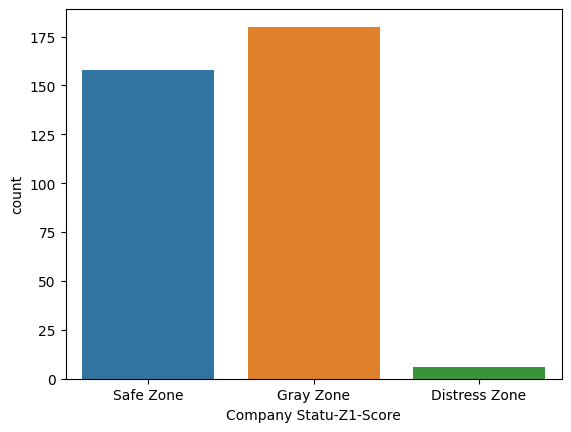

In [13]:
print(dframe['Company Statu-Z-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z1-Score'])

In [14]:
filtered_df = dframe[dframe['Company Statu-Z-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name                     Years
0         AAPL                    [1997]
1          HPQ              [2012, 2002]
2          IBM  [1994, 1993, 1992, 1991]


In [15]:
df_z1score = dframe.groupby('Company Statu-Z1-Score')['Z1-Score'].agg(
    [('Z1 Value Count', 'count'),
     ('Z1 Mean', 'mean'),
     ('Z1 Std', 'std'),
     ('Z1 Maximum', 'max'),
     ('Z1 Minimum', 'min')]
).reset_index()

df_z1score

,Company Statu-Z1-Score,Z1 Value Count,Z1 Mean,Z1 Std,Z1 Maximum,Z1 Minimum
0,Distress Zone,6,1.04,0.13,1.19,0.85
1,Gray Zone,180,2.17,0.40,2.88,1.28
2,Safe Zone,158,3.90,0.73,5.81,2.90


Company Statu-Z1-Score
Gray Zone        180
Safe Zone        158
Distress Zone      6
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z1-Score', ylabel='count'>

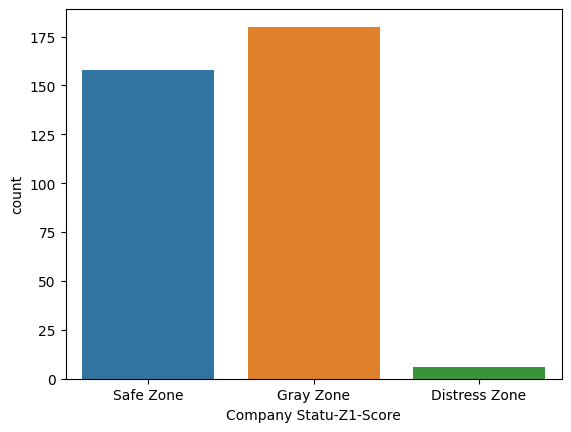

In [16]:
print(dframe['Company Statu-Z1-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z1-Score'])

In [17]:
filtered_df = dframe[dframe['Company Statu-Z1-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name         Years
0          HPQ        [2012]
1          IBM  [1993, 1992]
2         MSFT        [2017]
3         ORCL  [2019, 2018]


In [18]:
df_z2score = dframe.groupby('Company Statu-Z2-Score')['Z2-Score'].agg(
    [('Z2 Value Count', 'count'),
     ('Z2 Mean', 'mean'),
     ('Z2 Std', 'std'),
     ('Z2 Maximum', 'max'),
     ('Z2 Minimum', 'min')]
).reset_index()

df_z2score

,Company Statu-Z2-Score,Z2 Value Count,Z2 Mean,Z2 Std,Z2 Maximum,Z2 Minimum
0,Distress Zone,8,-0.24,0.95,1.07,-2.19
1,Gray Zone,11,1.99,0.37,2.54,1.44
2,Safe Zone,325,8.53,3.47,18.50,2.60


Company Statu-Z2-Score
Safe Zone        325
Gray Zone         11
Distress Zone      8
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z2-Score', ylabel='count'>

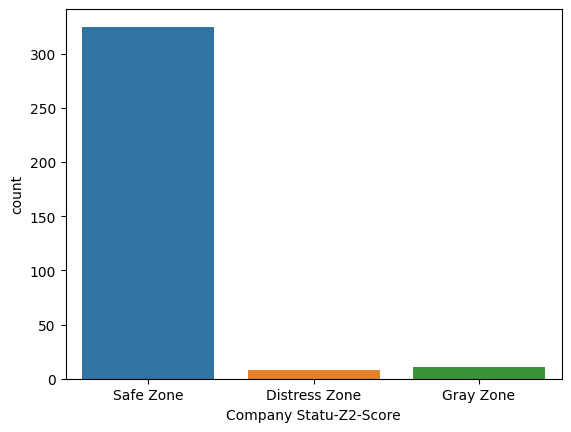

In [19]:
print(dframe['Company Statu-Z2-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z2-Score'])

In [20]:
filtered_df = dframe[dframe['Company Statu-Z2-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name                     Years
0         AAPL                    [1997]
1         AMZN        [2006, 2005, 2004]
2          HPQ  [2019, 2018, 2017, 2016]


# T Test 5 Variable by the Z Score Model

In [48]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_4 = []
non_bankrupt_F_4 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_4 = row['F_4']
    f_5 = row['F_5']
    
    if z_score >= 1.8:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_4.append(float(f_4))
        bankrupt_F_5.append(float(f_5))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_4.append(float(f_4))
        non_bankrupt_F_5.append(float(f_5))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_4 = np.mean(bankrupt_F_4)
mean_non_bankrupt_F_4 = np.mean(non_bankrupt_F_4)
mean_bankrupt_F_5 = np.mean(bankrupt_F_5)
mean_non_bankrupt_F_5 = np.mean(non_bankrupt_F_5)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_4 = np.std(bankrupt_F_4, ddof=1)
std_dev_non_bankrupt_F_4 = np.std(non_bankrupt_F_4, ddof=1)
std_dev_bankrupt_F_5 = np.std(bankrupt_F_5, ddof=1)
std_dev_non_bankrupt_F_5 = np.std(non_bankrupt_F_5, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_4, p_value_F_4 = stats.ttest_ind(bankrupt_F_4,non_bankrupt_F_4)
t_statistic_F_5, p_value_F_5 = stats.ttest_ind(bankrupt_F_5,non_bankrupt_F_5)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Market Value ratio(F_4)','Efficiency ratio(F_5)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_4,mean_bankrupt_F_5],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_4,std_dev_bankrupt_F_5],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_4,mean_non_bankrupt_F_5],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_4,std_dev_non_bankrupt_F_5],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_4,t_statistic_F_5],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_4,p_value_F_5]
    
}

# Create a DataFrame from the results dictionary
result_df_Zscore = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore['Result'] = result_df_Zscore['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")


# Display the result table
result_df_Zscore

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),337,0.56,0.21,7,0.32,0.10,3.01,0.00,Reject the null hypothesis: There is a signifi...
1,Profitability ratio(F_2),337,0.42,0.32,7,0.19,0.06,1.88,0.06,Fail to reject the null hypothesis: There is n...
2,Efficiency ratio(F_3),337,0.17,0.11,7,-0.07,0.10,5.60,0.00,Reject the null hypothesis: There is a signifi...
3,Market Value ratio(F_4),337,7.14,17.11,7,0.18,0.15,1.08,0.28,Fail to reject the null hypothesis: There is n...
4,Efficiency ratio(F_5),337,0.88,0.42,7,0.94,0.35,-0.37,0.71,Fail to reject the null hypothesis: There is n...


# T Test 5 Variable by the Z1 Score Model

In [46]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_6 = []
non_bankrupt_F_6 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z1-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_6 = row['F_6']
    f_5 = row['F_5']
    
    if z_score >= 1.23:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_6.append(float(f_6))
        bankrupt_F_5.append(float(f_5))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_6.append(float(f_6))
        non_bankrupt_F_5.append(float(f_5))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_6 = np.mean(bankrupt_F_6)
mean_non_bankrupt_F_6 = np.mean(non_bankrupt_F_6)
mean_bankrupt_F_5 = np.mean(bankrupt_F_5)
mean_non_bankrupt_F_5 = np.mean(non_bankrupt_F_5)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_6 = np.std(bankrupt_F_6, ddof=1)
std_dev_non_bankrupt_F_6 = np.std(non_bankrupt_F_6, ddof=1)
std_dev_bankrupt_F_5 = np.std(bankrupt_F_5, ddof=1)
std_dev_non_bankrupt_F_5 = np.std(non_bankrupt_F_5, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_6, p_value_F_6 = stats.ttest_ind(bankrupt_F_6,non_bankrupt_F_6)
t_statistic_F_5, p_value_F_5 = stats.ttest_ind(bankrupt_F_5,non_bankrupt_F_5)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Net Worth ratio(F_6)','Efficiency ratio(F_5)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_6,mean_bankrupt_F_5],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_6,std_dev_bankrupt_F_5],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_6,mean_non_bankrupt_F_5],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_6,std_dev_non_bankrupt_F_5],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_6,t_statistic_F_5],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_6,p_value_F_5]
    
}

# Create a DataFrame from the results dictionary
result_df_Zscore1 = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore1['Result'] = result_df_Zscore1['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")

# Display the result table
result_df_Zscore1

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),338,0.56,0.21,6,0.27,0.06,3.43,0.00,Reject the null hypothesis: There is a signifi...
1,Profitability ratio(F_2),338,0.42,0.32,6,0.11,0.10,2.33,0.02,Reject the null hypothesis: There is a signifi...
2,Efficiency ratio(F_3),338,0.17,0.12,6,-0.00,0.11,3.55,0.00,Reject the null hypothesis: There is a signifi...
3,Net Worth ratio(F_6),338,1.95,1.67,6,0.37,0.11,2.31,0.02,Reject the null hypothesis: There is a signifi...
4,Efficiency ratio(F_5),338,0.89,0.42,6,0.61,0.32,1.64,0.10,Fail to reject the null hypothesis: There is n...


# T Test 5 Variable by the Z2 Score Model

In [47]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_6 = []
non_bankrupt_F_6 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z2-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_6 = row['F_6']
    
    if z_score >= 1.1:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_6.append(float(f_6))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_6.append(float(f_6))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_6 = np.mean(bankrupt_F_6)
mean_non_bankrupt_F_6 = np.mean(non_bankrupt_F_6)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_6 = np.std(bankrupt_F_6, ddof=1)
std_dev_non_bankrupt_F_6 = np.std(non_bankrupt_F_6, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_6, p_value_F_6 = stats.ttest_ind(bankrupt_F_6,non_bankrupt_F_6)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Net Worth ratio(F_6)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_6],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_6],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_6],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_6],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_6],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_6]
    
}

result_df_Zscore2 = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore2['Result'] = result_df_Zscore2['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")

result_df_Zscore2

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),336,0.57,0.19,8,0.01,0.14,8.07,0.00,Reject the null hypothesis: There is a signifi...
1,Profitability ratio(F_2),336,0.43,0.31,8,-0.22,0.31,5.92,0.00,Reject the null hypothesis: There is a signifi...
2,Efficiency ratio(F_3),336,0.17,0.12,8,0.06,0.12,2.61,0.01,Reject the null hypothesis: There is a signifi...
3,Net Worth ratio(F_6),336,1.97,1.66,8,0.03,0.17,3.30,0.00,Reject the null hypothesis: There is a signifi...


# K-Means clustering for the Modified Altman Z-Score 

In [24]:
from sklearn.cluster import KMeans

X=dframe['Z-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z-Score)'] = dframe['Z-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z-Score', 'K-means clustering(Z-Score)', 'Company Statu-K-Mean(Z-Score)']])

    Company Name  Z-Score  K-means clustering(Z-Score)   
0      005930.KS     4.86                            0  \
1      005930.KS     4.52                            0   
2      005930.KS     5.05                            0   
3      005930.KS     4.63                            0   
4      005930.KS     4.32                            0   
..           ...      ...                          ...   
425         ORCL     3.69                            0   
426         ORCL     6.57                            0   
427         ORCL     5.84                            0   
428         ORCL     6.44                            0   
429         ORCL     5.20                            0   

    Company Statu-K-Mean(Z-Score)  
0                            Gray  
1                            Gray  
2                            Gray  
3                            Gray  
4                        Distress  
..                            ...  
425                      Distress  
426            

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df_kmeanzscore = dframe.groupby('Company Statu-K-Mean(Z-Score)')['Z-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanzscore

,Company Statu-K-Mean(Z-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,182,3.04,0.71,4.37,0.94
1,Gray,141,8.05,3.97,19.86,4.44
2,Safe,21,32.08,30.54,163.92,20.26


Company Statu-K-Mean(Z-Score)
Distress    182
Gray        141
Safe         21
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z-Score)', ylabel='count'>

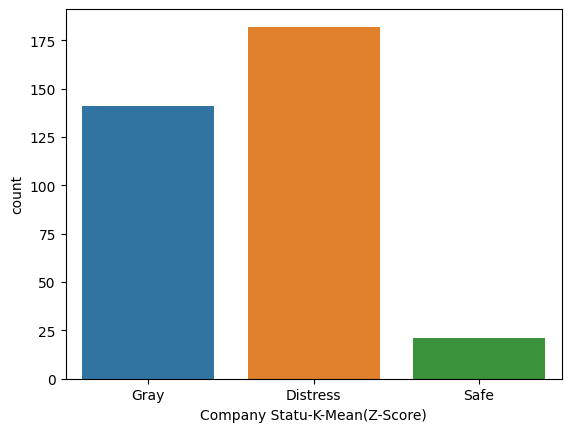

In [26]:
print(dframe['Company Statu-K-Mean(Z-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z-Score)'])

# K-Means clustering for the Modified Altman Z1-Score 

In [27]:
from sklearn.cluster import KMeans

X=dframe['Z1-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z1-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z1-Score)'] = dframe['Z1-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z1-Score', 'K-means clustering(Z1-Score)', 'Company Statu-K-Mean(Z1-Score)']])

    Company Name  Z1-Score  K-means clustering(Z1-Score)   
0      005930.KS      3.26                             0  \
1      005930.KS      3.51                             0   
2      005930.KS      3.48                             0   
3      005930.KS      3.42                             0   
4      005930.KS      3.49                             0   
..           ...       ...                           ...   
425         ORCL      2.96                             0   
426         ORCL      3.14                             0   
427         ORCL      3.05                             0   
428         ORCL      2.64                             0   
429         ORCL      2.45                             2   

    Company Statu-K-Mean(Z1-Score)  
0                             Safe  
1                             Safe  
2                             Safe  
3                             Safe  
4                             Safe  
..                             ...  
425                 

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df_kmeanz1score = dframe.groupby('Company Statu-K-Mean(Z1-Score)')['Z1-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanz1score

,Company Statu-K-Mean(Z1-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,76,1.71,0.27,2.00,0.85
1,Gray,140,2.56,0.33,3.17,2.03
2,Safe,128,4.11,0.66,5.81,3.18


Company Statu-K-Mean(Z1-Score)
Gray        140
Safe        128
Distress     76
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z1-Score)', ylabel='count'>

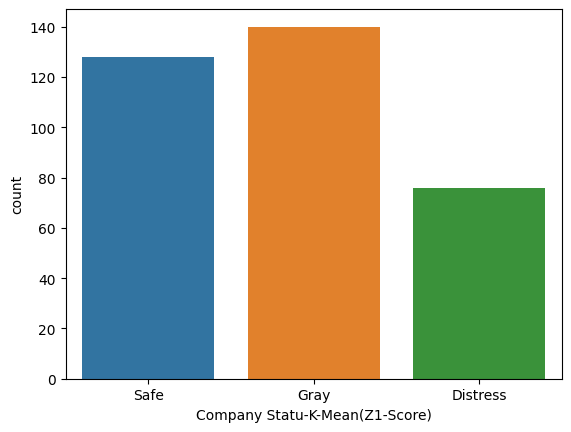

In [29]:
print(dframe['Company Statu-K-Mean(Z1-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z1-Score)'])

# K-Means clustering for the Modified Altman Z2-Score 

In [30]:
from sklearn.cluster import KMeans

X=dframe['Z2-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z2-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z2-Score)'] = dframe['Z2-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z2-Score', 'K-means clustering(Z2-Score)', 'Company Statu-K-Mean(Z2-Score)']])

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Company Name Z2-Score  K-means clustering(Z2-Score)   
0      005930.KS    10.81                             1  \
1      005930.KS    11.08                             1   
2      005930.KS    10.74                             1   
3      005930.KS    10.84                             1   
4      005930.KS    10.94                             1   
..           ...      ...                           ...   
425         ORCL     6.83                             0   
426         ORCL     7.16                             0   
427         ORCL     7.41                             0   
428         ORCL     7.07                             0   
429         ORCL     6.12                             0   

    Company Statu-K-Mean(Z2-Score)  
0                             Safe  
1                             Safe  
2                             Safe  
3                             Safe  
4                             Safe  
..                             ...  
425                           Gr

In [31]:
df_kmeanz2score = dframe.groupby('Company Statu-K-Mean(Z2-Score)')['Z2-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanz2score

,Company Statu-K-Mean(Z2-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,35,2.02,1.44,3.46,-2.19
1,Gray,137,5.84,1.12,7.43,3.61
2,Safe,172,11.18,2.50,18.50,7.47


Company Statu-K-Mean(Z2-Score)
Safe        172
Gray        137
Distress     35
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z2-Score)', ylabel='count'>

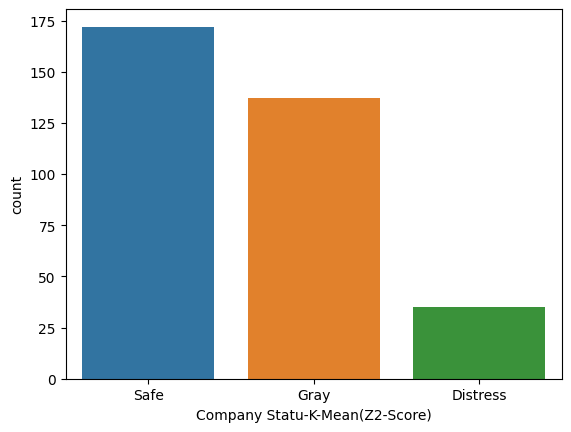

In [32]:
print(dframe['Company Statu-K-Mean(Z2-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z2-Score)'])

In [33]:
#'ABT', 'GSK', 'MRK', 'NVO?', 'PFE', 'PRGO', 'RDY' 
dframe[['Company Name','Year','Z2-Score','Company Statu-Z-Score','Company Statu-K-Mean(Z-Score)','Company Statu-Z1-Score','Company Statu-K-Mean(Z1-Score)','Company Statu-Z2-Score','Company Statu-K-Mean(Z2-Score)']][dframe['Company Statu-K-Mean(Z2-Score)']=='Distress']

,Company Name,Year,Z2-Score,Company Statu-Z-Score,Company Statu-K-Mean(Z-Score),Company Statu-Z1-Score,Company Statu-K-Mean(Z1-Score),Company Statu-Z2-Score,Company Statu-K-Mean(Z2-Score)
58,AAPL,1997,1.07,Distress Zone,Distress,Gray Zone,Distress,Distress Zone,Distress
59,AAPL,1996,2.54,Gray Zone,Distress,Gray Zone,Distress,Gray Zone,Distress
108,AMZN,2019,3.08,Safe Zone,Gray,Gray Zone,Distress,Safe Zone,Distress
109,AMZN,2018,3.00,Safe Zone,Gray,Gray Zone,Gray,Safe Zone,Distress
110,AMZN,2017,2.07,Safe Zone,Gray,Gray Zone,Distress,Gray Zone,Distress
111,AMZN,2016,2.34,Safe Zone,Gray,Gray Zone,Gray,Gray Zone,Distress
112,AMZN,2015,1.90,Safe Zone,Gray,Gray Zone,Distress,Gray Zone,Distress
113,AMZN,2014,1.65,Safe Zone,Distress,Gray Zone,Distress,Gray Zone,Distress
114,AMZN,2013,2.19,Safe Zone,Gray,Gray Zone,Gray,Gray Zone,Distress
115,AMZN,2012,2.31,Safe Zone,Gray,Gray Zone,Gray,Gray Zone,Distress


In [37]:
filtered_df = dframe[dframe['Company Statu-K-Mean(Z2-Score)'] == 'Distress']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)

for index, row in grouped.iterrows():
    print(row['Company Name'], row['Years'])


AAPL [1997, 1996]
AMZN [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2008, 2007, 2006, 2005, 2004]
HPQ [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
IBM [2002, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992]
MSFT [2017]
ORCL [2019]


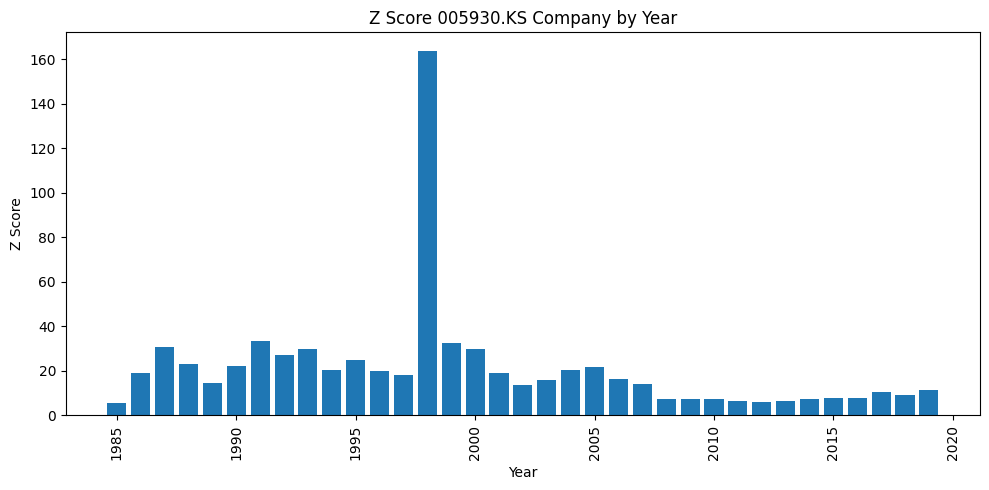

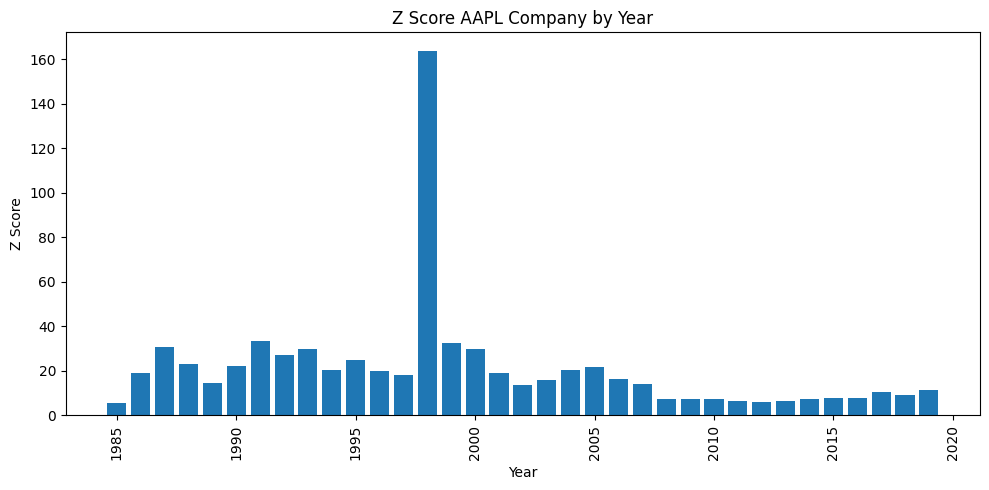

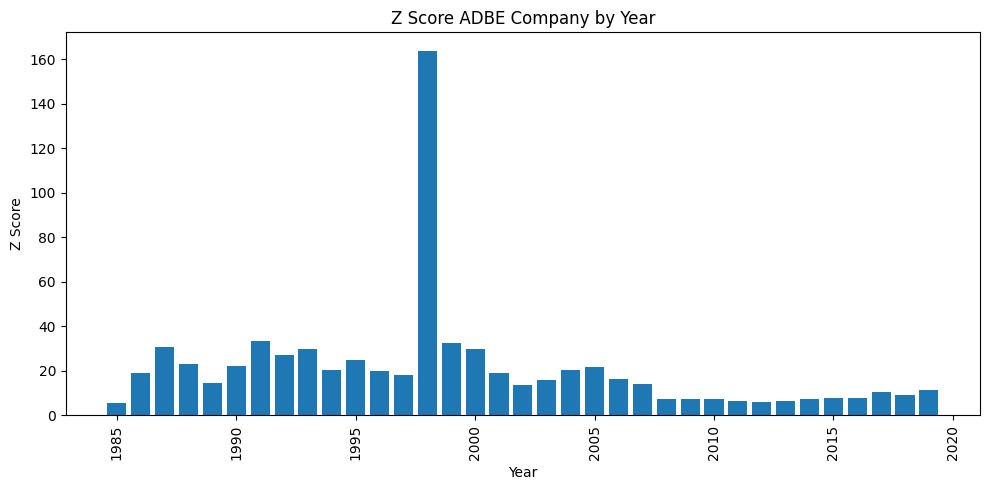

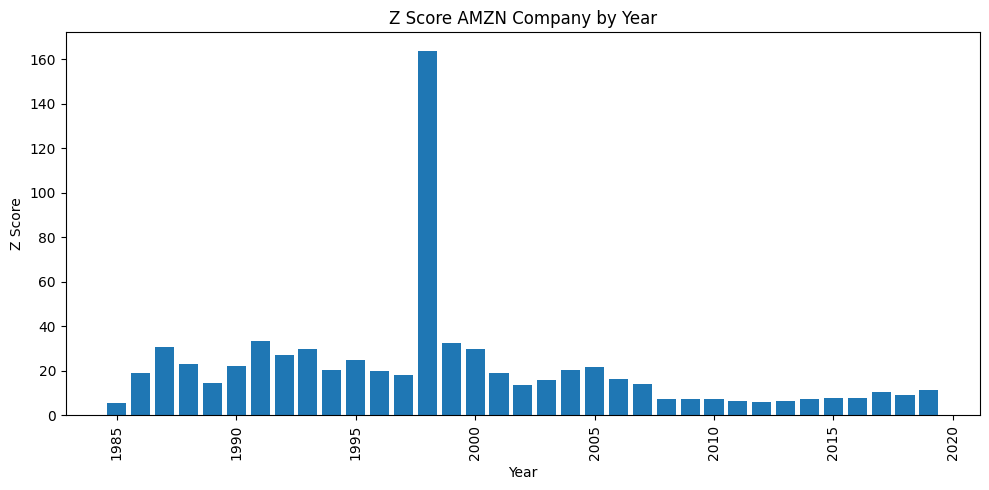

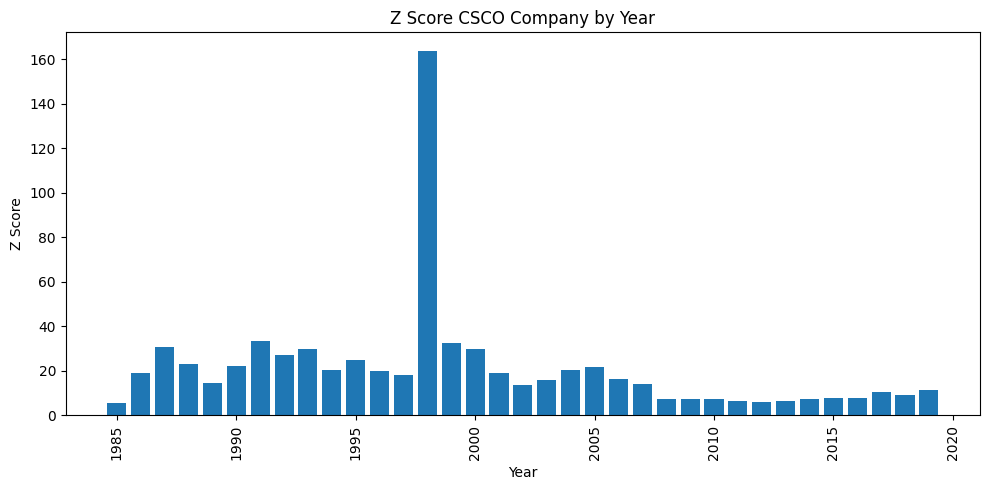

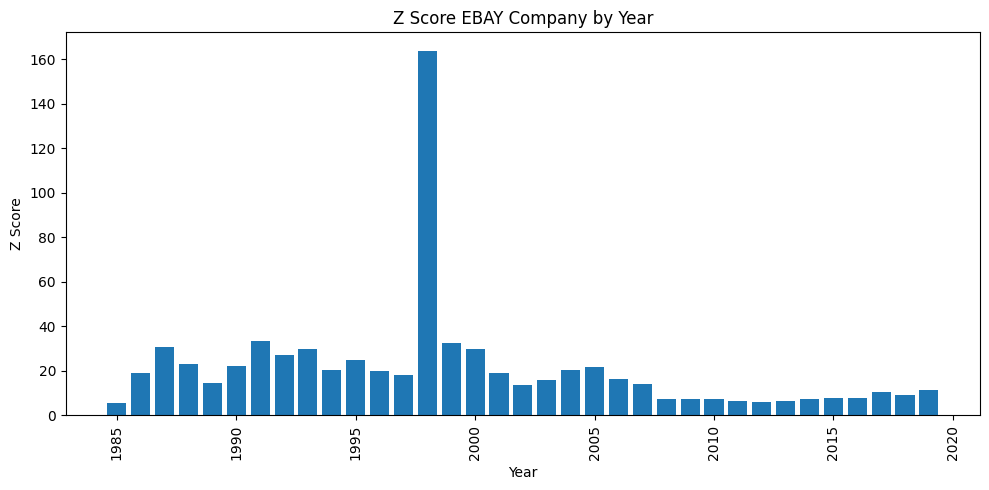

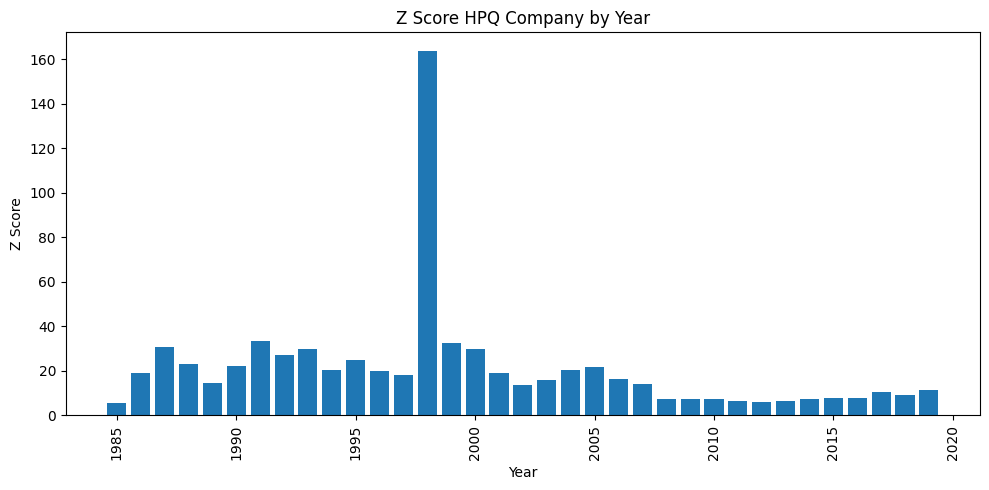

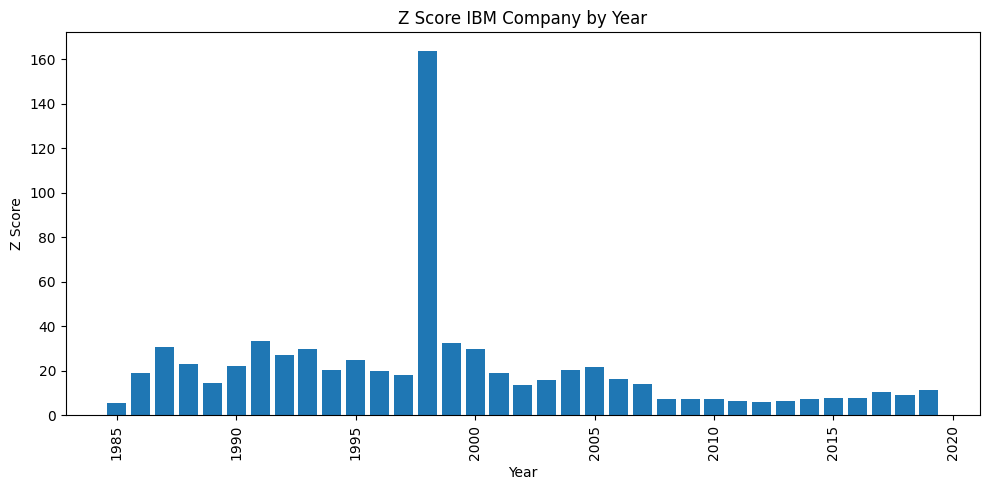

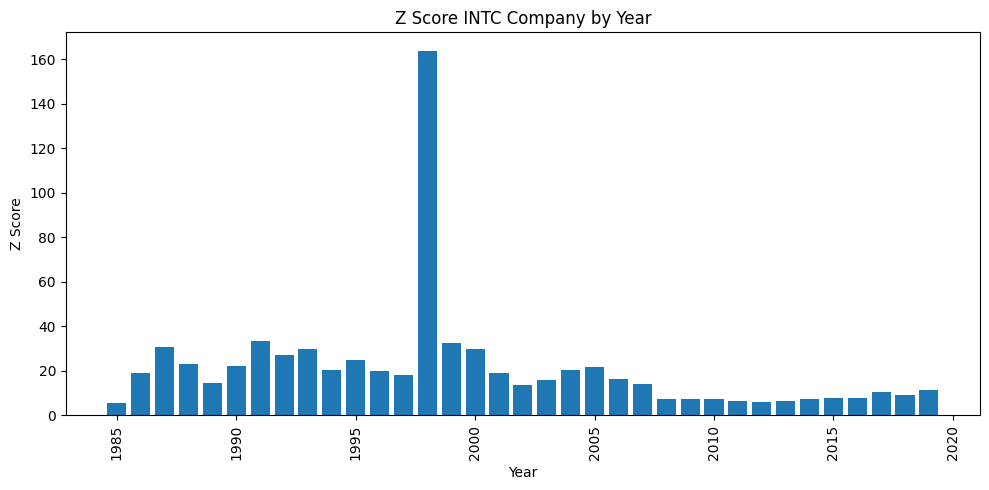

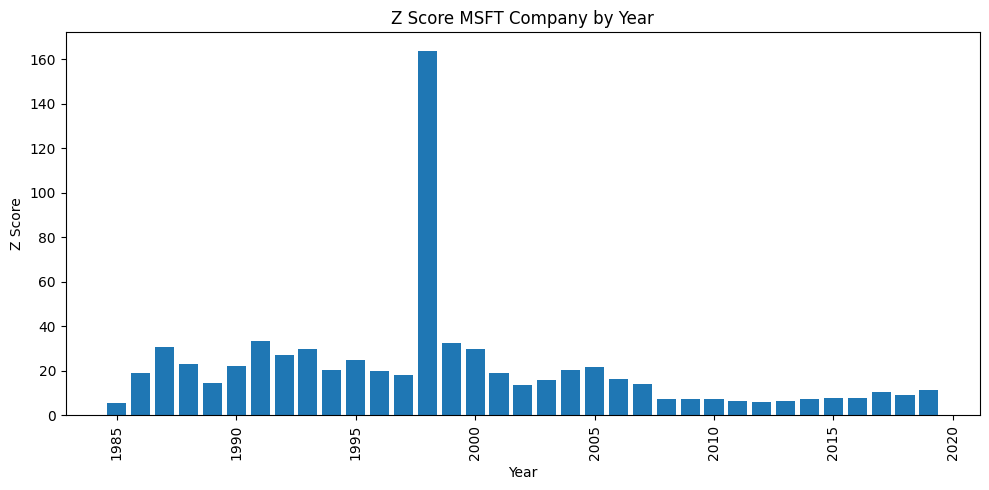

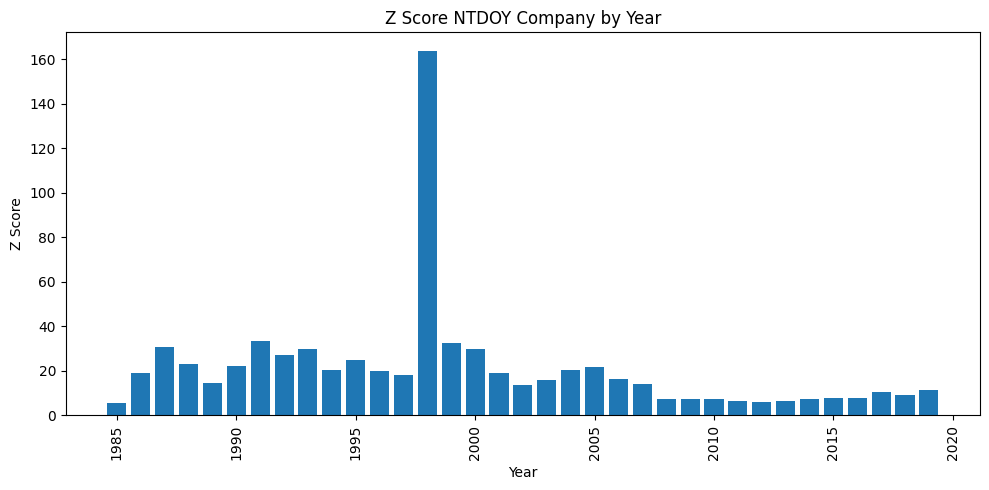

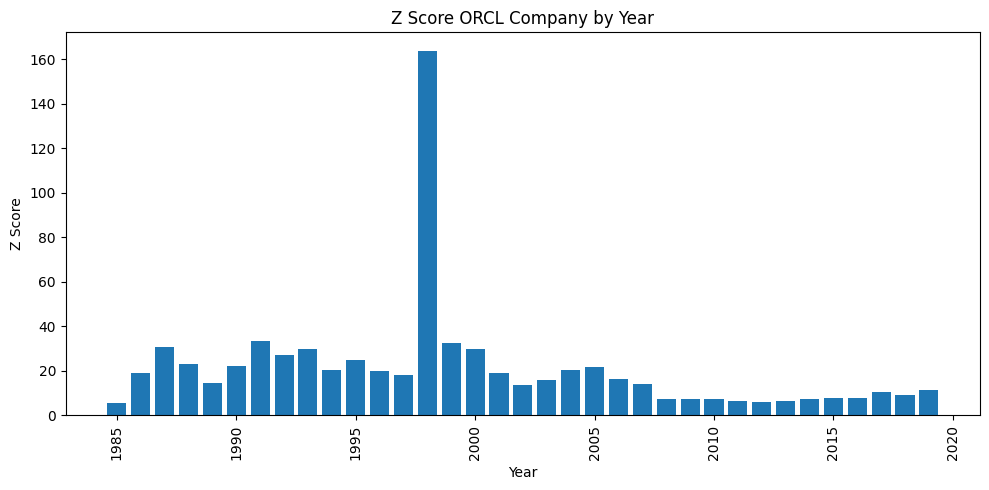

ORCL not found in the DataFrame.


In [35]:
import matplotlib.pyplot as plt

for company in companies:
    Year=dframe['Year']
    Zscore=dframe['Z-Score']
    
    plt.figure(figsize=(10, 5))
    plt.bar(Year, Zscore)  
    plt.xlabel('Year')
    plt.ylabel('Z Score')
    plt.title(f'Z Score {company} Company by Year')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
       
else:
    print(f"{company} not found in the DataFrame.")